In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


# OverView

In [2]:
df = pd.read_excel('loan.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().mean().sort_values(ascending=False).round(3)*100

Credit_History       8.1
Self_Employed        5.2
LoanAmount           3.6
Dependents           2.4
Loan_Amount_Term     2.3
Gender               2.1
Married              0.5
Loan_ID              0.0
Education            0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

credit_history has 8.1 % value missing 

self_employed has 5.2 % value missing 

Other have < 5 % value missing

In [7]:
nums = df.select_dtypes(exclude=['object']).columns.to_list()
nums

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [8]:
cag = df.select_dtypes(include=['object']).columns.to_list()
cag

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# Imputation

In [342]:
df.isnull().mean().sort_values(ascending=False).round(3)*100

Credit_History       8.1
Self_Employed        5.2
LoanAmount           3.6
Dependents           2.4
Loan_Amount_Term     2.3
Gender               2.1
Married              0.5
Loan_ID              0.0
Education            0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [9]:
df1 = df.copy()

In [10]:
def fmode(cag):
    m = df1[cag].mode()
    m = m[0]
    df1[cag] = df1[cag].fillna(m)

    

In [11]:
for i in cag:
    fmode(i)

In [12]:
df1[cag].isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [13]:
cag = cag[1:]

i :Gender and mode : Male 


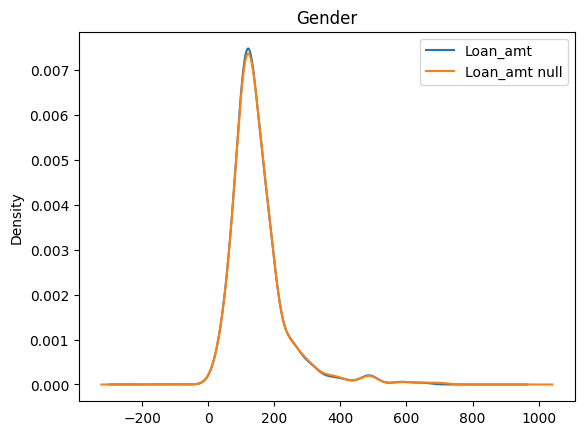

i :Married and mode : Yes 


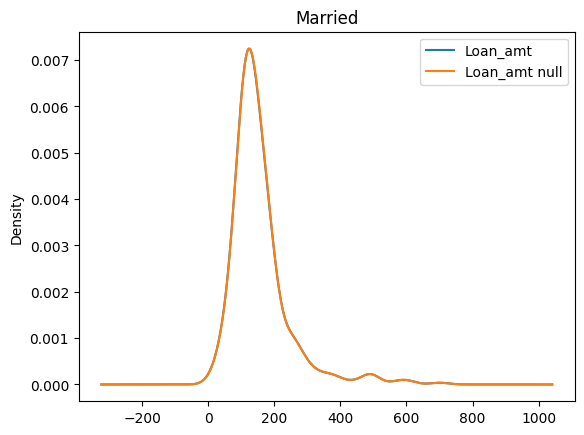

i :Dependents and mode : 0 


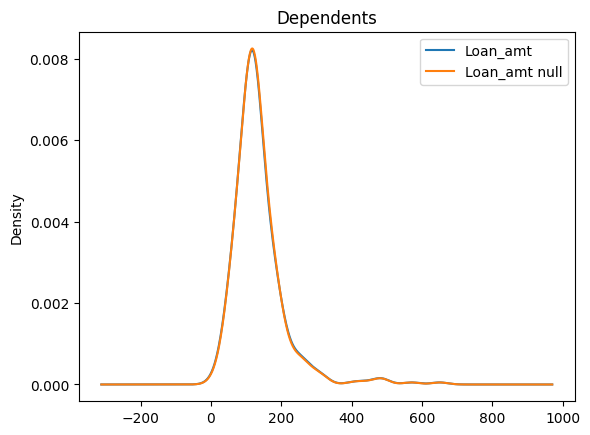

i :Education and mode : Graduate 


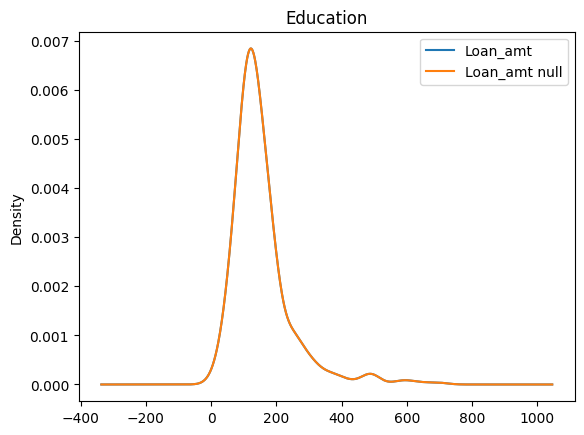

i :Self_Employed and mode : No 


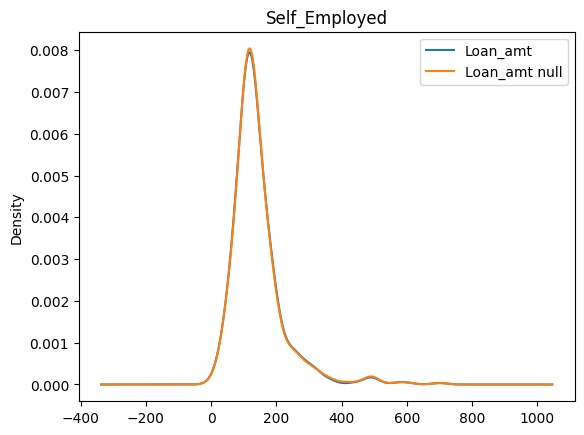

i :Property_Area and mode : Semiurban 


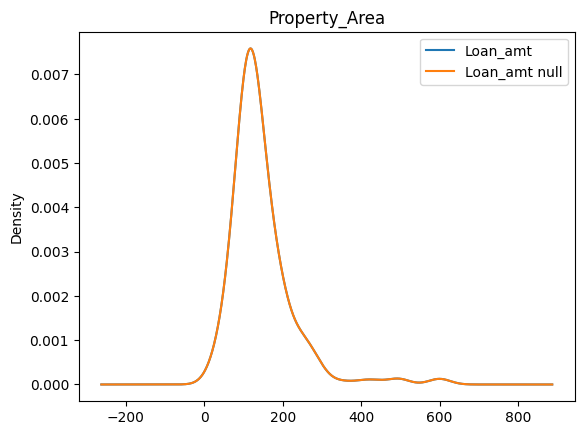

i :Loan_Status and mode : Y 


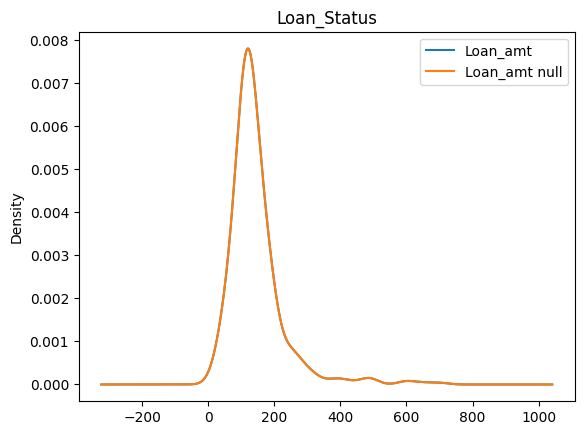

In [14]:
for i in cag:
    
    m = df1[i].mode()
    m = m[0]
    print(f'i :{i} and mode : {m} ')
    df[df[i] == m]['LoanAmount'].plot(kind='kde')
    df1[df1[i] == m]['LoanAmount'].plot(kind='kde')

    labels = ['Loan_amt','Loan_amt null']
    plt.legend(labels)
    plt.title(i)
    plt.show()

In [15]:
df1[nums].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [16]:
m = df1['LoanAmount'].mean()
m

146.41216216216216

In [17]:
mean = df1['LoanAmount'].mean()
cm = df1['Credit_History'].mode()[0]
cm

1.0

In [18]:
m = df1['Loan_Amount_Term'].mode()[0]
df1['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(m)
df1['LoanAmount'] = df1['LoanAmount'].fillna(mean)
df1['Credit_History'] = df1['Credit_History'].fillna(cm)

In [19]:
df1.isnull().sum()
df1.drop(columns=['Loan_ID'],inplace=True)

In [20]:
df1[nums[1:]].isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

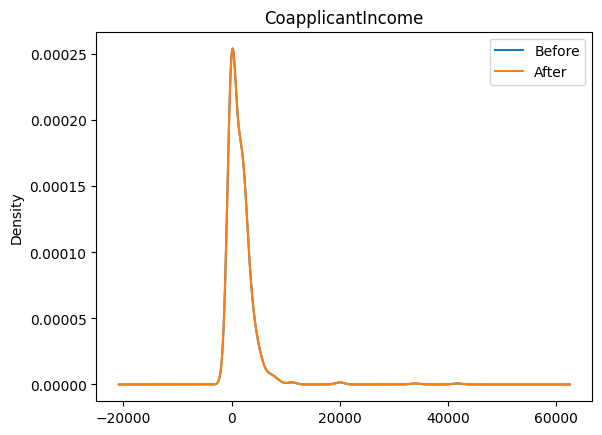

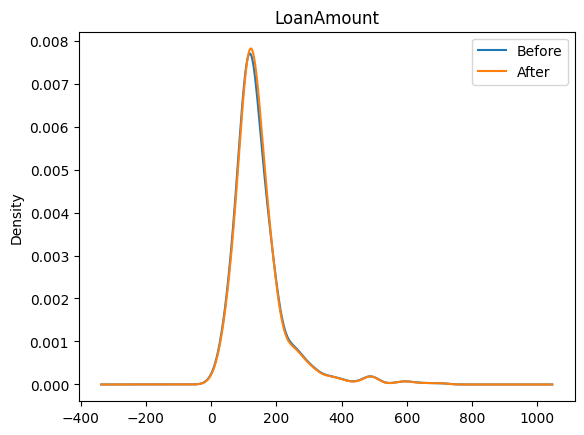

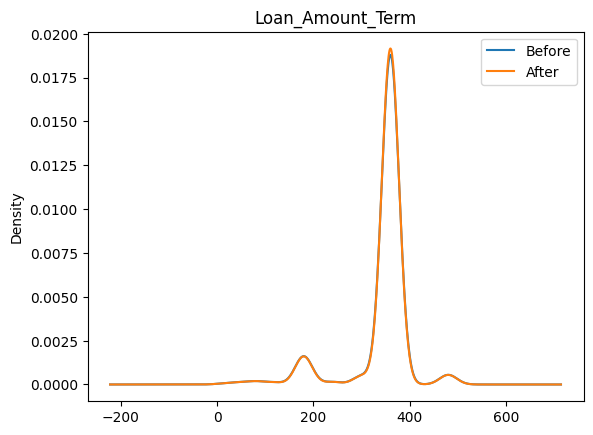

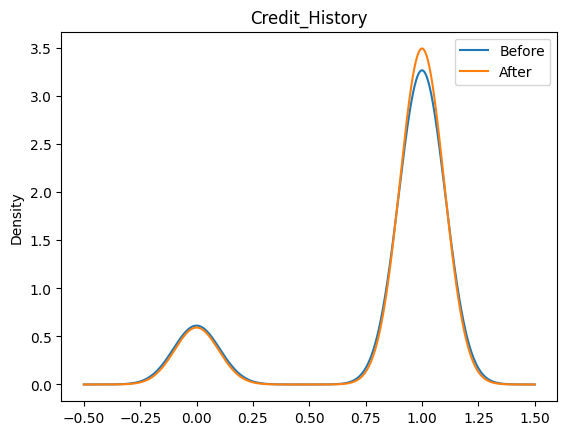

In [21]:
for i in nums[1:]:
    df[i].plot(kind='kde')
    df1[i].plot(kind='kde')
    plt.title(i)
    labels = ['Before','After']
    plt.legend(labels)
    plt.show()


No Significant change in Distribution

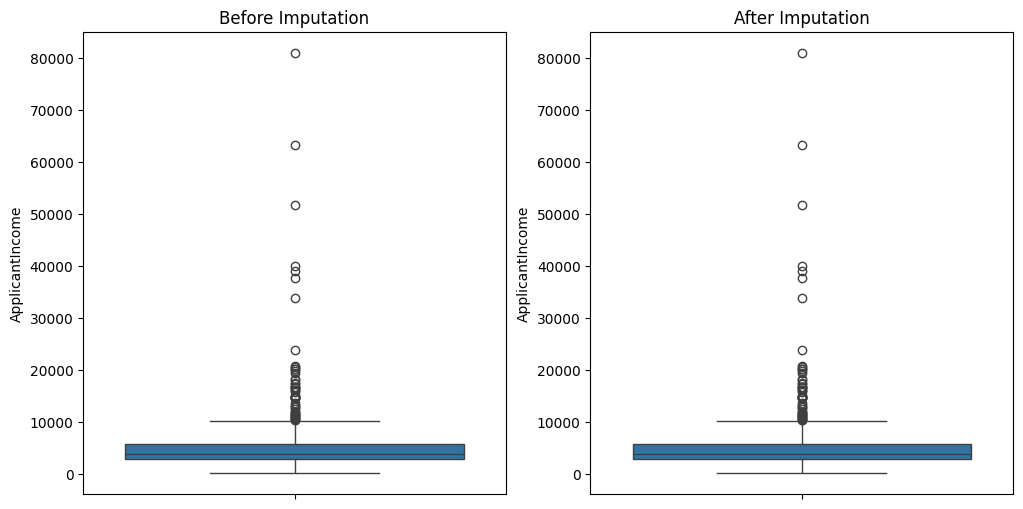

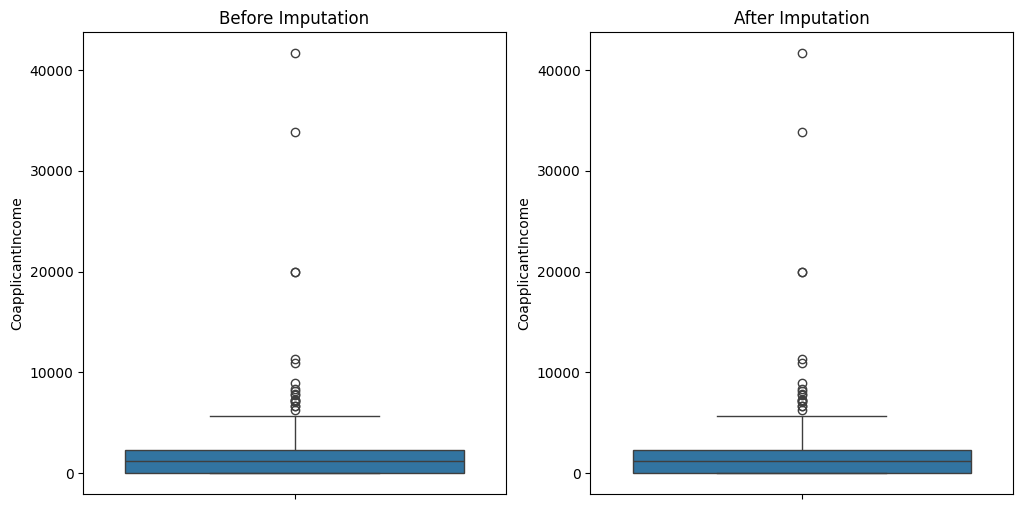

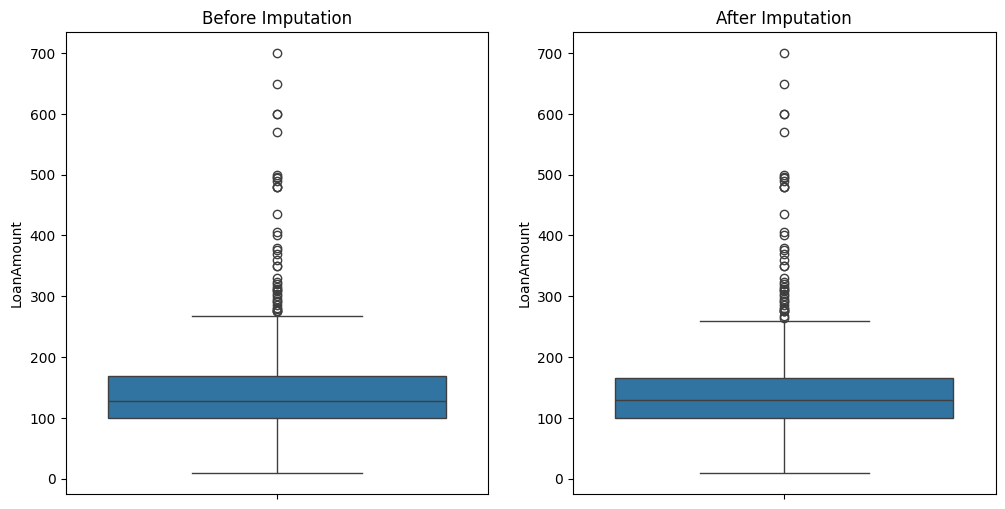

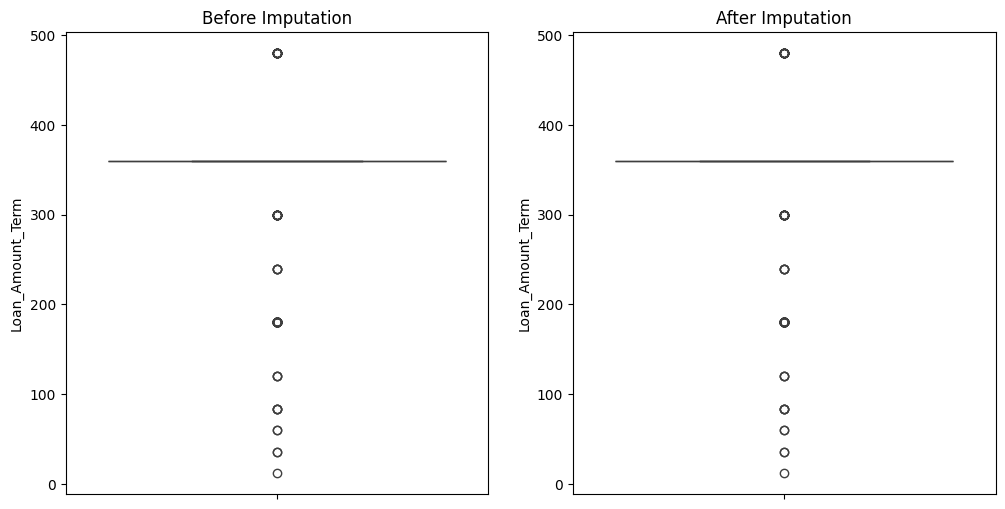

In [22]:
for i in nums[:-1]:
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[i])
    plt.title('Before Imputation')
    

    # Box plot after imputation
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df1[i])
    plt.title('After Imputation')

    plt.show()


No change in Outliers

# EDA

In [23]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [30]:
a = lambda x: 1 if x == 'Y' else 0
df1['Loan_Status'] = df1['Loan_Status'].apply(a)

## Cag Cols

### Gender

In [86]:
df1.groupby(['Gender'])['Loan_Status'].mean()

Gender
Female    0.669643
Male      0.691235
Name: Loan_Status, dtype: float64

Almost Same % for Male and Female

or slightly More for Male (69 %) as compare to Female(66 %) 

In [196]:
df1.groupby(['Gender','Loan_Status']).size().unstack()

Loan_Status,0,1
Gender,,
Female,37,75
Male,155,347


In [197]:
df1['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [201]:
female = 75/112  
female

0.6696428571428571

In [202]:
Male = 347 / 502
Male

0.6912350597609562

In [203]:
# That's what we getting when we do this 
df1.groupby(['Gender'])['Loan_Status'].mean()

Gender
Female    0.669643
Male      0.691235
Name: Loan_Status, dtype: float64

In [193]:
df1.pivot_table(index='Gender', values='Loan_Status', aggfunc='mean')

,Loan_Status
Gender,
Female,0.669643
Male,0.691235


In [194]:
df1.pivot_table(index='Gender', columns='Loan_Status', aggfunc='size')

Loan_Status,0,1
Gender,,
Female,37,75
Male,155,347


<Axes: xlabel='Gender'>

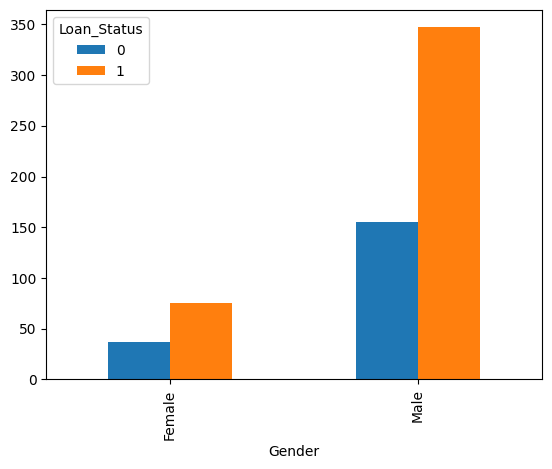

In [95]:
df1.pivot_table(index='Gender', columns='Loan_Status', aggfunc='size').plot(kind='bar')

### Married

In [87]:
df1.groupby(['Married'])['Loan_Status'].mean()

Married
No     0.629108
Yes    0.718204
Name: Loan_Status, dtype: float64

Getting a Loan for Married is 72 % and single is 63 %

### Education

In [103]:
df1.groupby(['Education'])['Loan_Status'].mean()

Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64

In [101]:
df1.groupby(['Education','Gender'])['Loan_Status'].mean().unstack()

Gender,Female,Male
Education,,
Graduate,0.663043,0.719072
Not Graduate,0.700000,0.596491


Female Not Graduate have 70 % chance of getting a loan 
But For Male Not Graduate is 59 % 

In [104]:
df1.groupby(['Education','Gender','Married'])['Loan_Status'].mean().unstack()

Married                    No       Yes
Education    Gender                    
Graduate     Female  0.636364  0.730769
             Male    0.627451  0.751748
Not Graduate Female  0.642857  0.833333
             Male    0.612903  0.590361

Female Not Graduate and Maried have 83 % chance of getting Loan

But For Male Ethier you have to be Graduate or be single to get Loan  

In [122]:
df1.pivot_table(index=['Education', 'Gender', 'Married'], values='Loan_Status', aggfunc='mean').unstack()


Loan_Status          
Married                      No       Yes
Education    Gender                      
Graduate     Female    0.636364  0.730769
             Male      0.627451  0.751748
Not Graduate Female    0.642857  0.833333
             Male      0.612903  0.590361

In [124]:
df1.pivot_table(columns=['Education', 'Gender', 'Married'], values='Loan_Status', aggfunc='mean')


Education    Graduate                               Not Graduate            \
Gender         Female                Male                 Female             
Married            No       Yes        No       Yes           No       Yes   
Loan_Status  0.636364  0.730769  0.627451  0.751748     0.642857  0.833333   

Education                        
Gender           Male            
Married            No       Yes  
Loan_Status  0.612903  0.590361

### Self_Employed

In [129]:
df1.groupby(['Self_Employed'])['Loan_Status'].mean()

Self_Employed
No     0.687970
Yes    0.682927
Name: Loan_Status, dtype: float64

In [221]:
df1.groupby(['Self_Employed','Gender','Education','Married'])['Loan_Status'].mean().unstack()


Married                                  No       Yes
Self_Employed Gender Education                       
No            Female Graduate      0.637931  0.782609
                     Not Graduate  0.636364  0.800000
              Male   Graduate      0.629213  0.746939
                     Not Graduate  0.629630  0.594595
Yes           Female Graduate      0.625000  0.333333
                     Not Graduate  0.666667  1.000000
              Male   Graduate      0.615385  0.780488
                     Not Graduate  0.500000  0.555556

In [218]:
result = df1.groupby(['Self_Employed','Gender','Education','Married','Loan_Status']).size().unstack()
result['Total'] = result.sum(axis=1)

print(result)


Loan_Status                                   0      1  Total
Self_Employed Gender Education    Married                    
No            Female Graduate     No       21.0   37.0   58.0
                                  Yes       5.0   18.0   23.0
                     Not Graduate No        4.0    7.0   11.0
                                  Yes       1.0    4.0    5.0
              Male   Graduate     No       33.0   56.0   89.0
                                  Yes      62.0  183.0  245.0
                     Not Graduate No       10.0   17.0   27.0
                                  Yes      30.0   44.0   74.0
Yes           Female Graduate     No        3.0    5.0    8.0
                                  Yes       2.0    1.0    3.0
                     Not Graduate No        1.0    2.0    3.0
                                  Yes       NaN    1.0    1.0
              Male   Graduate     No        5.0    8.0   13.0
                                  Yes       9.0   32.0   41.0
        

Self Employed Female who are Married and Not Graduate we have only one such value Thus getting 100 %

Not Self Employed Male who are Graduate and  Married have 245 applications out of which 183 got loan  

### Property_Area


In [225]:
df1.groupby(['Property_Area'])['Loan_Status'].mean()

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64

In [236]:
result = df1.groupby(['Property_Area','Loan_Status']).size().unstack()
result['Total'] = result.sum(axis=1)
print(result)


Loan_Status     0    1  Total
Property_Area                
Rural          69  110    179
Semiurban      54  179    233
Urban          69  133    202


In [237]:
df1.groupby(['Married','Gender','Property_Area'])['Loan_Status'].mean().unstack()

Property_Area      Rural  Semiurban     Urban
Married Gender                               
No      Female  0.631579   0.647059  0.629630
        Male    0.590909   0.739130  0.534884
Yes     Female  0.400000   0.952381  0.333333
        Male    0.630631   0.780303  0.722222

In [239]:
result = df1.groupby(['Married','Gender','Property_Area','Loan_Status']).size().unstack()
result['Total'] = result.sum(axis=1)
print(result)


Loan_Status                    0    1  Total
Married Gender Property_Area                
No      Female Rural           7   12     19
               Semiurban      12   22     34
               Urban          10   17     27
        Male   Rural          18   26     44
               Semiurban      12   34     46
               Urban          20   23     43
Yes     Female Rural           3    2      5
               Semiurban       1   20     21
               Urban           4    2      6
        Male   Rural          41   70    111
               Semiurban      29  103    132
               Urban          35   91    126


## Nums Cols

In [240]:
df1['Family_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [254]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Family_Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.687296,7024.705081
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.463973,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,81000.000000


In [283]:
nums = df1.select_dtypes(exclude='object').columns.to_list()
nums.remove('Loan_Status')
nums

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Family_Income']

In [288]:
def numplot(x,hue):
    if x != hue:
      sns.displot(df1, x=x ,hue=hue,kind='kde')
      plt.title(x)
      plt.show()


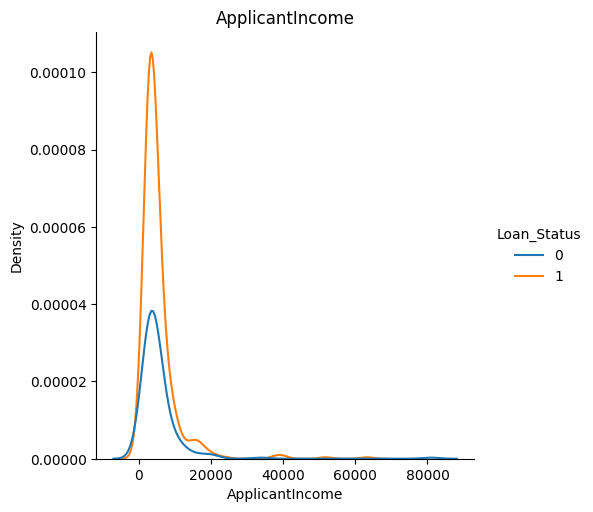

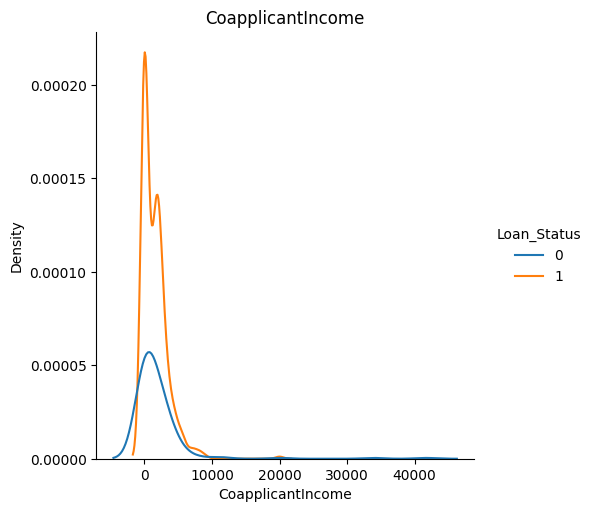

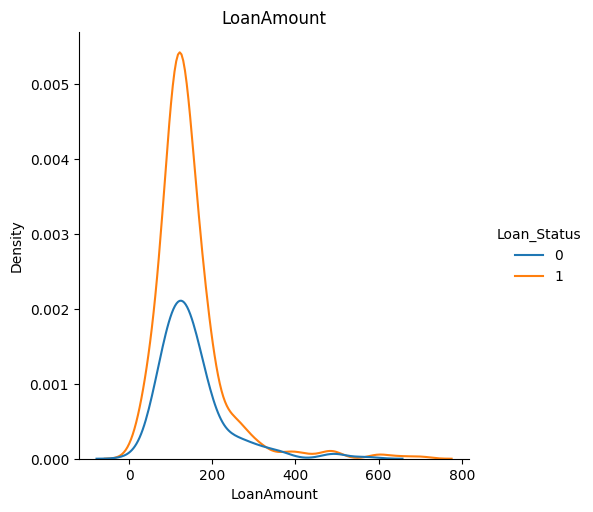

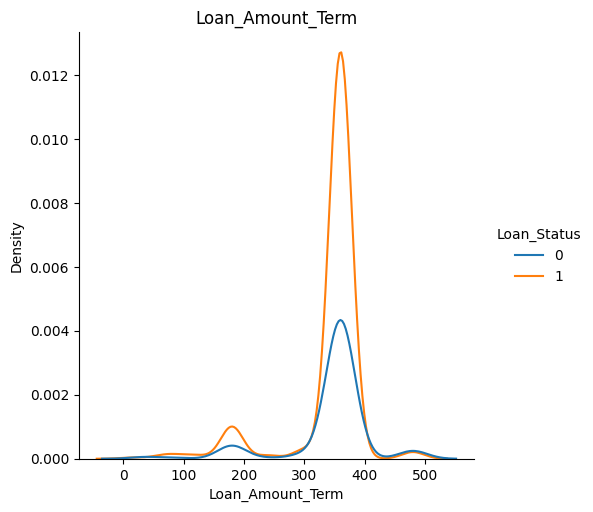

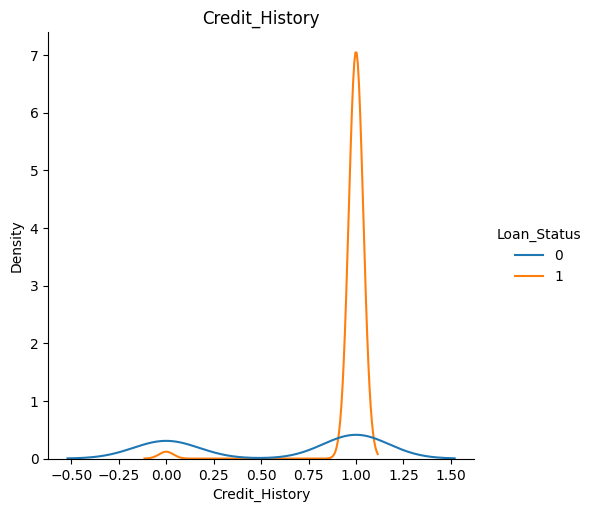

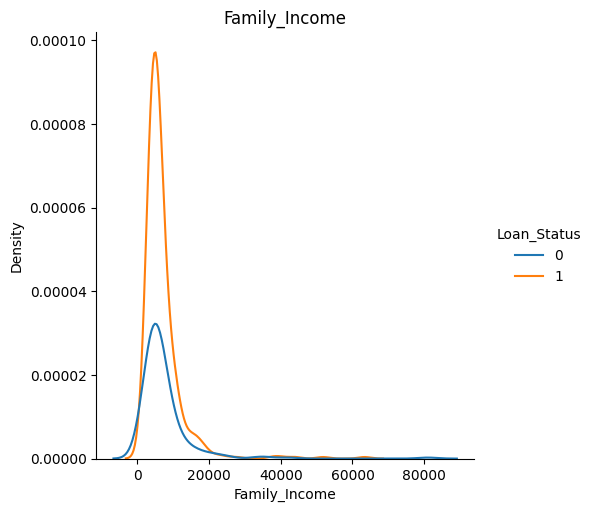

In [287]:
for i in nums:
    numplot(i,'Loan_Status')

### BoxPlots

In [308]:
def box_plot(col,hue):
    if col!=hue:
        sns.boxplot(df1,x = col ,hue = hue )
        plt.title(col)
        plt.show()

#### Based on Loan_Status

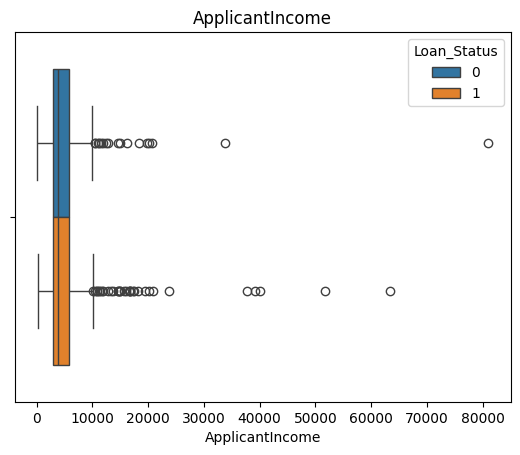

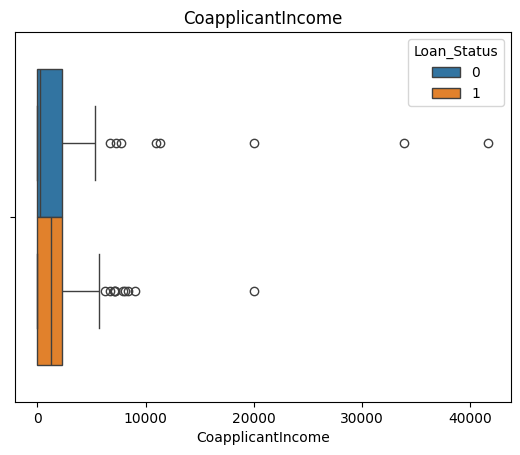

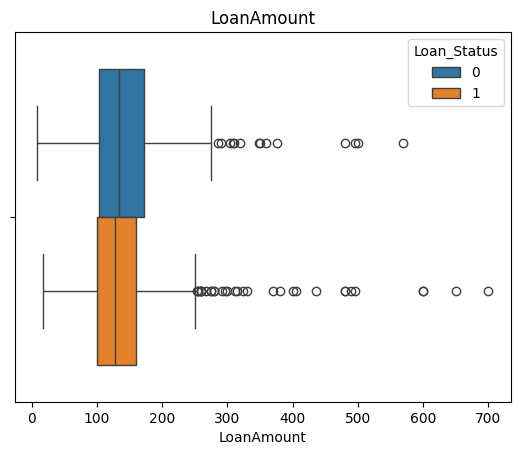

In [323]:
for i in nums[:-3]:
    box_plot(i,'Loan_Status')

#### Based on Education

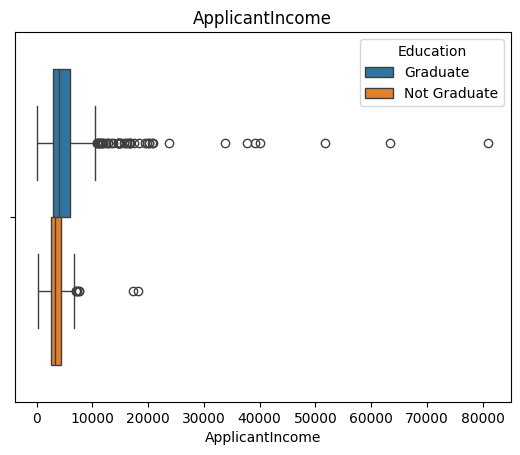

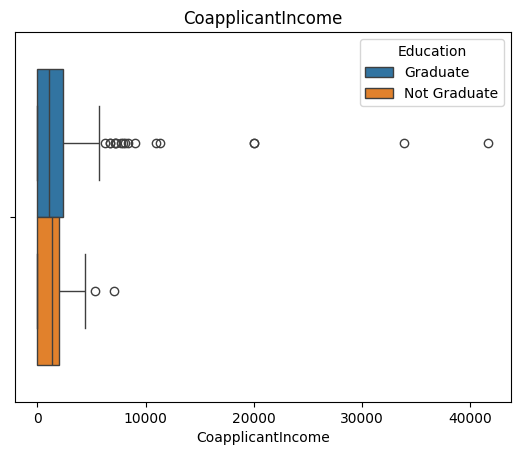

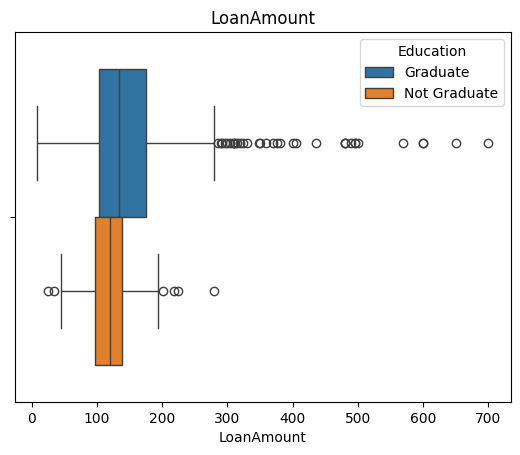

In [320]:
for col in nums[:-3]:
    box_plot(col,'Education') 

#### Based on Gender

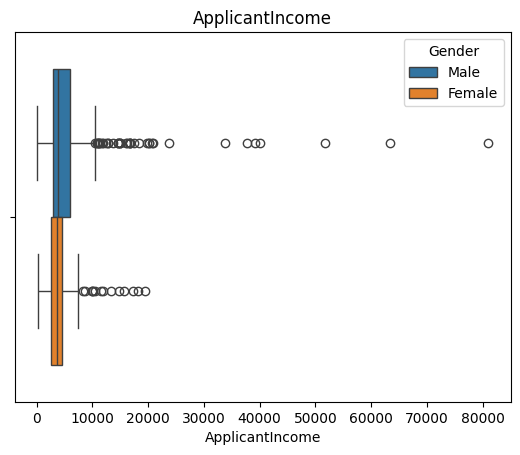

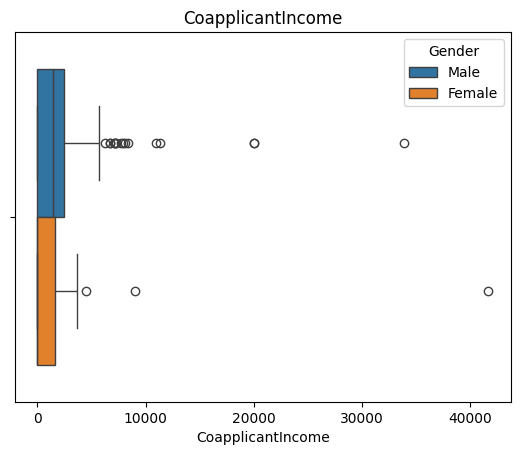

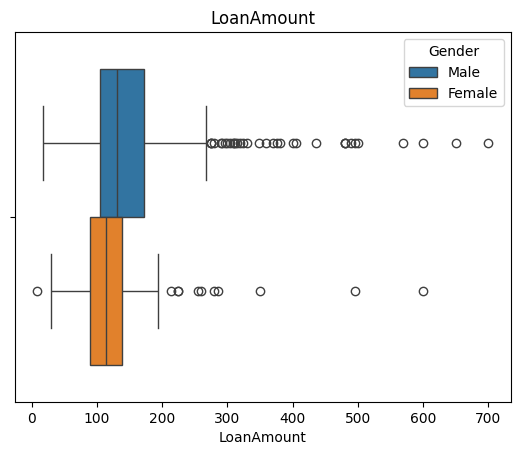

In [322]:
for col in nums[:-3]:
    box_plot(col,'Gender')

#### Based on Married

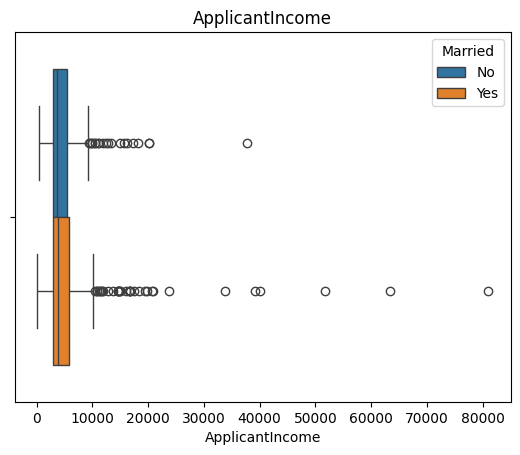

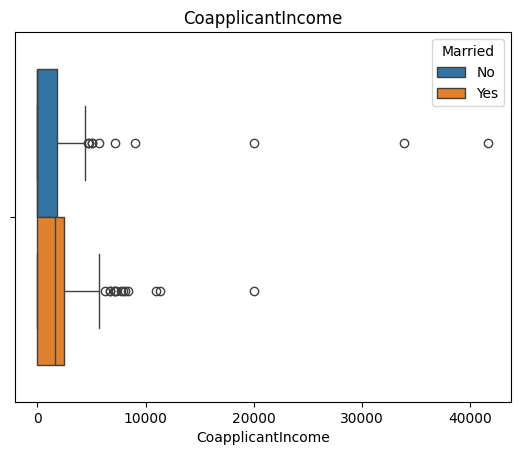

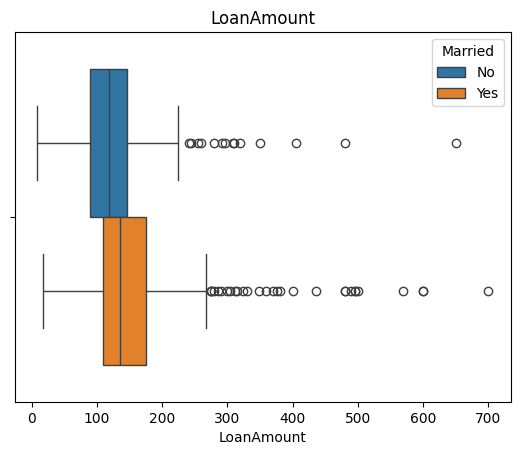

In [315]:
for i in nums[:-3]:
    box_plot(i,'Married')

#### Based on Self_Employed

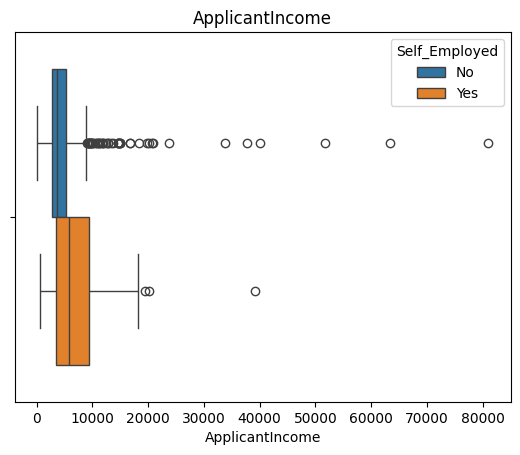

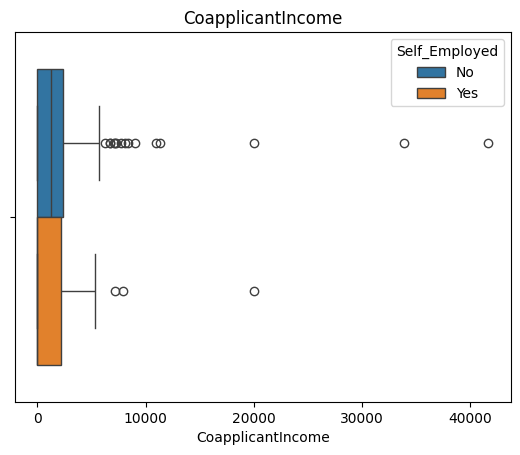

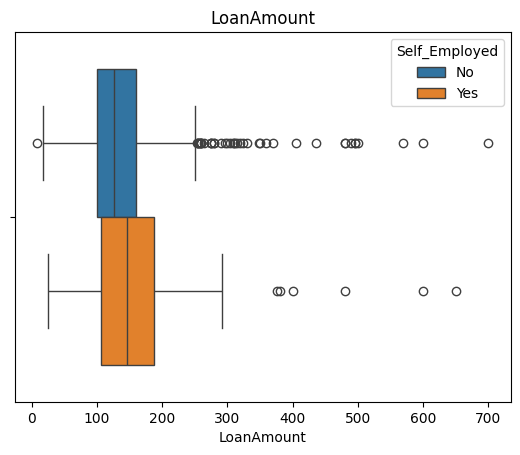

In [319]:
for i in nums[:-3]:
    box_plot(i,'Self_Employed')

# Funtion_Tranformer

In [324]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
 12  Family_Income      614 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 62.5+ KB


In [328]:
df1.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [329]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    int64  
 10  Family_Income     614 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


<Axes: ylabel='Frequency'>

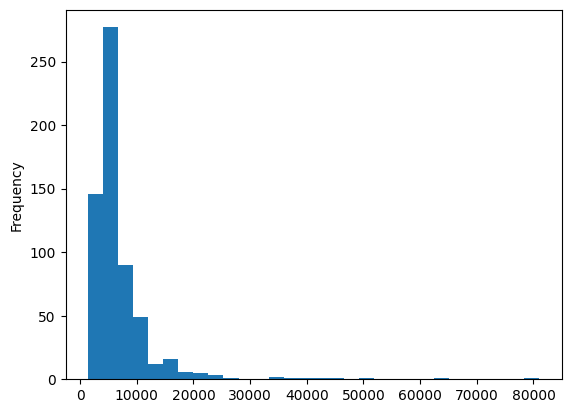

In [335]:
df1['Family_Income'].plot(kind='hist',bins=30)

<Axes: ylabel='Frequency'>

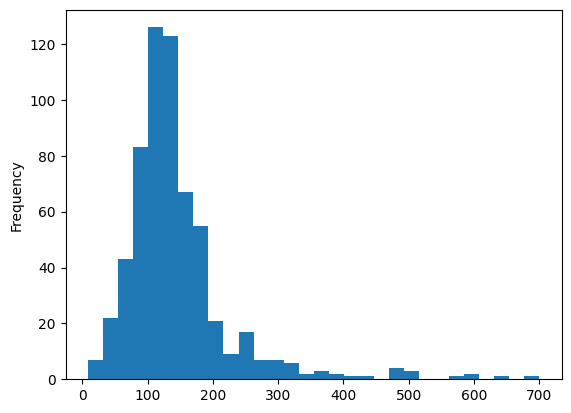

In [336]:
df1['LoanAmount'].plot(kind='hist',bins=30)

As Both are Right Skew Thus Applying  log Transformer

In [337]:
df1['LoanAmount'] = np.log(df1['LoanAmount'])

In [338]:
df1['Family_Income'] = np.log(df1['Family_Income'])


<Axes: ylabel='Frequency'>

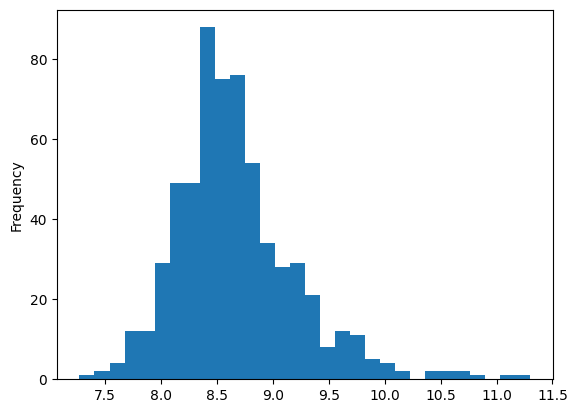

In [339]:
df1['Family_Income'].plot(kind='hist',bins=30)

<Axes: ylabel='Frequency'>

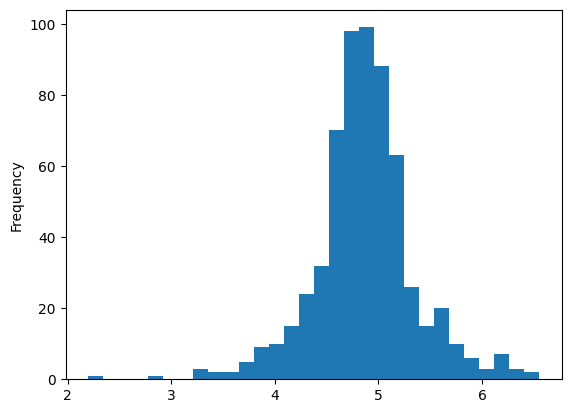

In [340]:
df1['LoanAmount'].plot(kind='hist',bins=30)

# Pipelines


In [463]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.pipeline import Pipeline

In [341]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    int64  
 10  Family_Income     614 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


7 Credit_History       8.1

4 Self_Employed        5.2

2 Dependents           2.4

6 Loan_Amount_Term     2.3

0 Gender               2.1

1 Married              

In [346]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Family_Income
0,Male,No,0,Graduate,No,4.986426,360.0,1.0,Urban,1,8.674026
1,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,0,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,1,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,1,8.505323
4,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,1,8.699515


In [386]:
trf1 = ColumnTransformer([
    ('Impute_LoanAmount',SimpleImputer(),[5]),
    ('Impute_mode',SimpleImputer(strategy='most_frequent'),[0,1,4,6,7])
    ],remainder='passthrough') 

In [387]:
trf2 = ColumnTransformer([
    ('ohe_cag',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),[0,1,3,4,8])
],remainder='passthrough')

In [392]:
trf3 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,11))
],remainder='passthrough')

In [351]:
trf4 =DecisionTreeClassifier(criterion='entropy',random_state=0)

In [393]:
pipe =Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)

])

In [394]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_LoanAmount',
                                                  SimpleImputer(), [5]),
                                                 ('Impute_mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 4, 6, 7])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_cag',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 3, 4, 8])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('trf4',
                 DecisionTreeClassifier(criterion='entropy', random_state=0))])

In [402]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Family_Income'],
      dtype='object')

In [395]:
X = df1.copy()
X.drop(columns=['Loan_Status'],inplace=True)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Family_Income
0,Male,No,0,Graduate,No,4.986426,360.0,1.0,Urban,8.674026
1,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,8.505323
4,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,8.699515


In [372]:
y = df1['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [373]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [396]:
pipe.fit(X_train,y_train)

ValueError: could not convert string to float: 'Yes'

In [398]:
t = ColumnTransformer(transformers=[
     ('trf1',trf1),
    ('trf2',trf2),
    
    
],remainder='passthrough')

In [399]:
t.fit_transform(X_train)

ValueError: not enough values to unpack (expected 3, got 2)

# Test

In [433]:
y = df1['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [403]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Family_Income'],
      dtype='object')

In [404]:
X.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Family_Income       float64
dtype: object

In [405]:
X_encoded = pd.get_dummies(X, columns=['Education', 'Gender','Married','Self_Employed','Property_Area','Dependents'], drop_first=True, sparse=False)


In [406]:
X_encoded.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Family_Income,Education_Not Graduate,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,4.986426,360.0,1.0,8.674026,False,True,False,False,False,True,False,False,False
1,4.852030,360.0,1.0,8.714568,False,True,True,False,False,False,True,False,False
2,4.189655,360.0,1.0,8.006368,False,True,True,True,False,True,False,False,False
3,4.787492,360.0,1.0,8.505323,True,True,True,False,False,True,False,False,False
4,4.948760,360.0,1.0,8.699515,False,True,False,False,False,True,False,False,False


In [435]:
xe_tr , xe_te , y_tr , y_te = train_test_split(X_encoded,y,test_size=0.2,random_state=0)

In [436]:
print(xe_tr.shape)
print(xe_te.shape)

print(y_tr.shape)
print(y_te.shape)


(491, 13)
(123, 13)
(491,)
(123,)


In [412]:
s =StandardScaler()

In [437]:
xes_tr = s.fit_transform(xe_tr)
xes_te = s.fit_transform(xe_te)


In [464]:
xes_te

array([[-0.94820576,  0.28661682,  0.3866946 , ..., -0.3866946 ,
        -0.3866946 , -0.29748206],
       [-0.31124426,  0.28661682,  0.3866946 , ..., -0.3866946 ,
        -0.3866946 , -0.29748206],
       [ 2.04068866,  0.28661682,  0.3866946 , ..., -0.3866946 ,
        -0.3866946 , -0.29748206],
       ...,
       [ 2.6980569 ,  0.28661682,  0.3866946 , ..., -0.3866946 ,
        -0.3866946 , -0.29748206],
       [-1.35188685, -2.33124469, -2.58602011, ..., -0.3866946 ,
        -0.3866946 ,  3.36154726],
       [-0.65255176,  0.28661682,  0.3866946 , ...,  2.58602011,
        -0.3866946 , -0.29748206]])

In [427]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [438]:
dt.fit(xes_tr,y_tr)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [439]:
y_pred = dt.predict(xes_te)

In [440]:
from sklearn import metrics

In [442]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [441]:
print(f'Acc is{metrics.accuracy_score(y_pred,y_te)} ')

Acc is0.6585365853658537 


In [443]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xes_tr,y_tr)

GaussianNB()

In [444]:
yn_pred = nb.predict(xes_te)

In [445]:
print(f'Acc is{metrics.accuracy_score(yn_pred,y_te)} ')

Acc is0.8373983739837398 


In [446]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt, xes_tr, y_tr, cv=5, scoring='accuracy').mean()

0.7210059781488353

In [447]:
cross_val_score(nb, xes_tr, y_tr, cv=5, scoring='accuracy').mean()

0.7943310657596372

In [465]:
# plt.figure(figsize=(44, 20))
# plot_tree(dt, feature_names=xe_tr.columns, class_names=['N','Y'], filled=True, rounded=True)
# plt.show()